In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

In [2]:
results_dir = Path("results")
values = np.load(results_dir / "results_SVM_mw_1.7.npy", allow_pickle=True).item()
terrains = values["terrains"]
values

{'pred': array(['PLOUGHED', 'UNPLOUGHED', 'UNPLOUGHED', ..., 'DIRT_ROAD',
        'UNPLOUGHED', 'UNPLOUGHED'], dtype=object),
 'true': array(['CONCRETE', 'CONCRETE', 'CONCRETE', ..., 'UNPLOUGHED',
        'UNPLOUGHED', 'UNPLOUGHED'], dtype=object),
 'ftime': [],
 'ptime': [],
 'channels': {'imu': {'wx': True,
   'wy': True,
   'wz': True,
   'ax': True,
   'ay': True,
   'az': True},
  'pro': {'velL': True, 'velR': True, 'curL': True, 'curR': True}},
 'terrains': ['CONCRETE', 'DIRT_ROAD', 'PLOUGHED', 'UNPLOUGHED']}

In [3]:
clf_values = values
# clf_values = values[1700]
ypred = clf_values["pred"]
ytest = clf_values["true"]

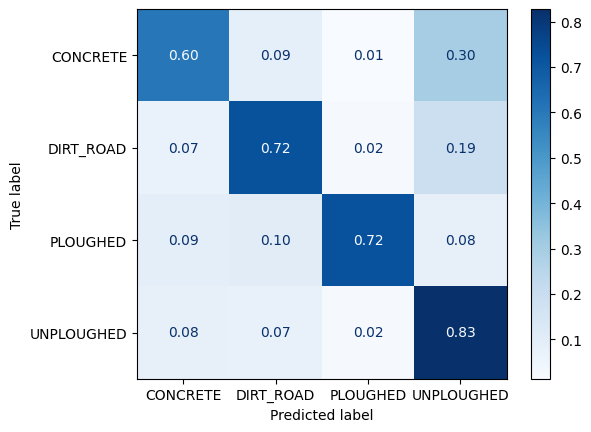

In [4]:
disp = ConfusionMatrixDisplay.from_predictions(
    ytest,
    ypred,
    labels=terrains,
    display_labels=terrains,
    normalize="true",
    values_format=".2f",
    cmap="Blues",
)

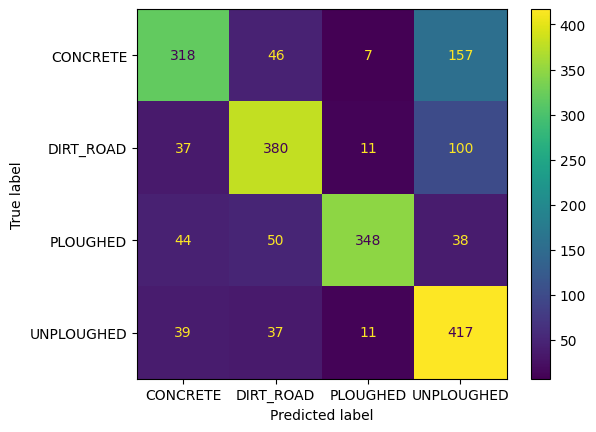

In [5]:
disp = ConfusionMatrixDisplay.from_predictions(
    ytest,
    ypred,
    labels=terrains,
    display_labels=terrains,
)

In [9]:
metrics = pd.Series(
    {
        "accuracy": accuracy_score(
            ytest,
            ypred,
        ),
        "precision": precision_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "recall": recall_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "f1-score": f1_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
    }
)

In [10]:
metrics

accuracy                                              0.717157
precision    [0.726027397260274, 0.7407407407407407, 0.9230...
recall       [0.6022727272727273, 0.7196969696969697, 0.725...
f1-score     [0.6583850931677019, 0.7300672430355427, 0.812...
dtype: object